**Data Precprocessing and Exploratory Data Analytics**

In [2]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [10]:
# Load the dataset
data = pd.read_json('/content/tesco_sample.json')

# Basic description
print(data.info())  # Overview of data types and missing values
print(data.head()) # Show the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           266 non-null    object        
 1   gtin13         266 non-null    int64         
 2   sku            266 non-null    int64         
 3   price          266 non-null    float64       
 4   condition      266 non-null    object        
 5   availability   266 non-null    object        
 6   currency       266 non-null    object        
 7   brand          266 non-null    object        
 8   breadcrumbs    266 non-null    object        
 9   description    266 non-null    object        
 10  images         266 non-null    object        
 11  avg_rating     266 non-null    object        
 12  reviews_count  266 non-null    object        
 13  url            266 non-null    object        
 14  _id            266 non-null    object        
 15  crawled_at     266 non-

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

name             0
gtin13           0
sku              0
price            0
condition        0
availability     0
currency         0
brand            0
breadcrumbs      0
description      0
images           0
avg_rating       0
reviews_count    0
url              0
_id              0
crawled_at       0
source           0
dtype: int64


In [14]:
# Drop rows with missing values
df_cleaned = data.dropna()

# Convert price column to numeric
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')

# Handle missing or invalid prices by filling with median
df_cleaned['price'].fillna(df_cleaned['price'].median(), inplace=True)

print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           266 non-null    object        
 1   gtin13         266 non-null    int64         
 2   sku            266 non-null    int64         
 3   price          266 non-null    float64       
 4   condition      266 non-null    object        
 5   availability   266 non-null    object        
 6   currency       266 non-null    object        
 7   brand          266 non-null    object        
 8   breadcrumbs    266 non-null    object        
 9   description    266 non-null    object        
 10  images         266 non-null    object        
 11  avg_rating     266 non-null    object        
 12  reviews_count  266 non-null    object        
 13  url            266 non-null    object        
 14  _id            266 non-null    object        
 15  crawled_at     266 non-

<ipython-input-14-96443148d91c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['price'].fillna(df_cleaned['price'].median(), inplace=True)


In [15]:
# Summary statistics for numerical columns
print(df_cleaned['price'].describe())
print(df_cleaned['avg_rating'].describe())

count    266.000000
mean       5.152556
std        5.188749
min        0.500000
25%        2.000000
50%        3.000000
75%        7.375000
max       30.000000
Name: price, dtype: float64
count     266
unique     25
top          
freq      146
Name: avg_rating, dtype: object


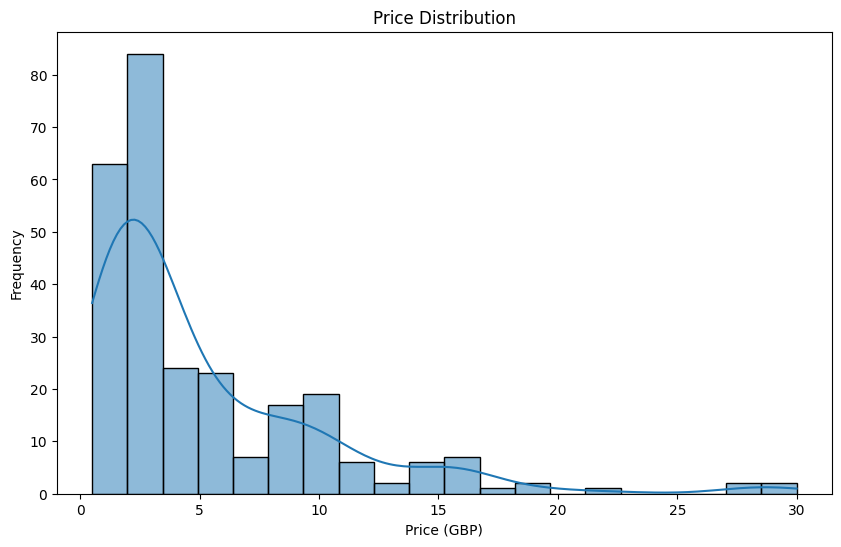

In [ ]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (GBP)')
plt.ylabel('Frequency')
plt.show()



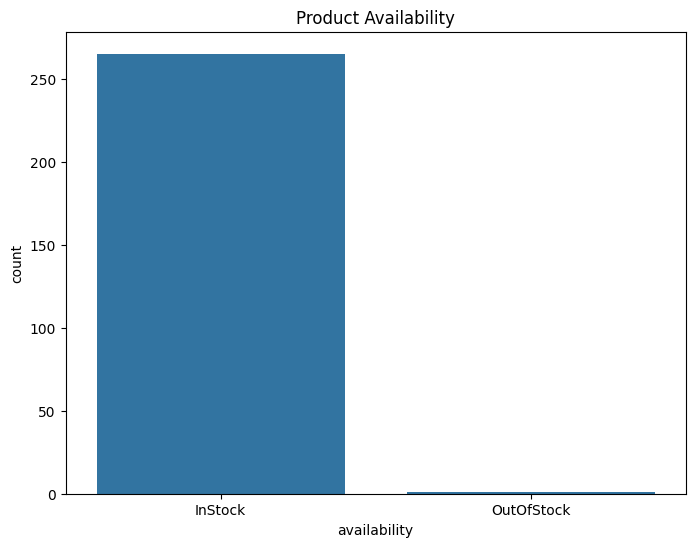

In [17]:
# Count plot for product availability
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='availability')
plt.title('Product Availability')
plt.show()

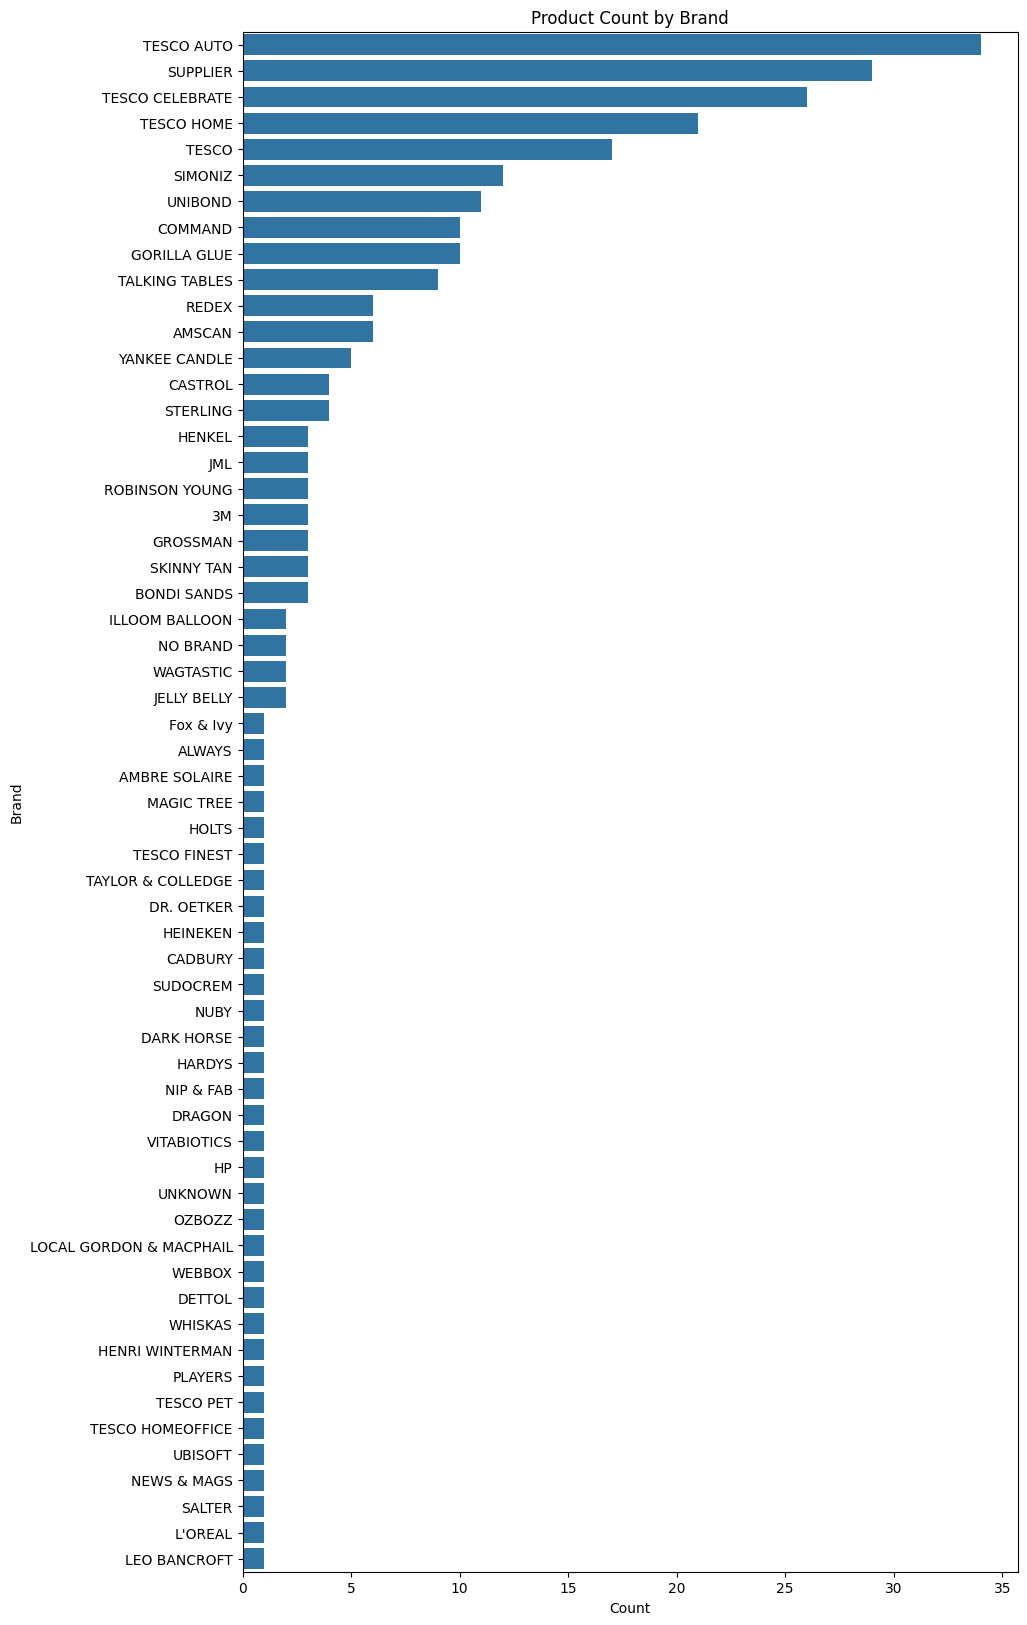

In [ ]:
# Count of products by brand
plt.figure(figsize=(10,20))
sns.countplot(data=data, y='brand', order=data['brand'].value_counts().index)
plt.title('Product Count by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()


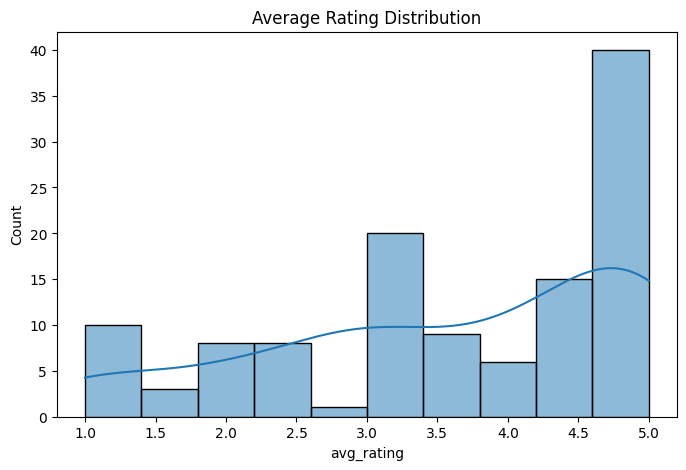

In [28]:
# Convert avg_rating to numeric
data['avg_rating'] = pd.to_numeric(data['avg_rating'], errors='coerce')
# Visualizing avg_rating distribution
plt.figure(figsize=(8,5))
sns.histplot(data['avg_rating'].dropna(), bins=10, kde=True)
plt.title('Average Rating Distribution')
plt.show()

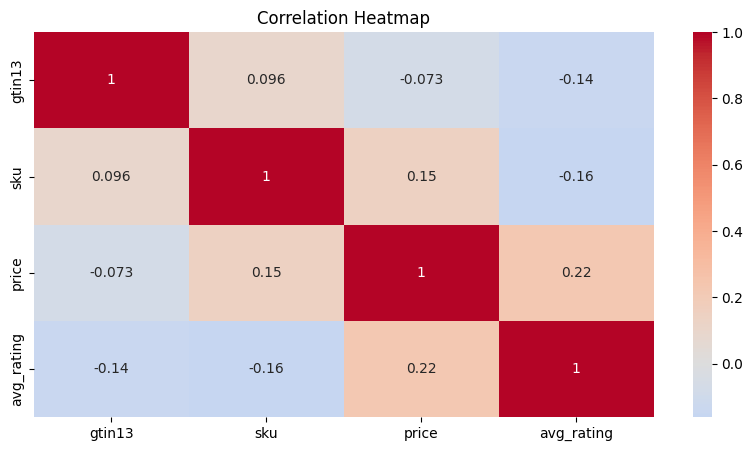

In [29]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,5))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

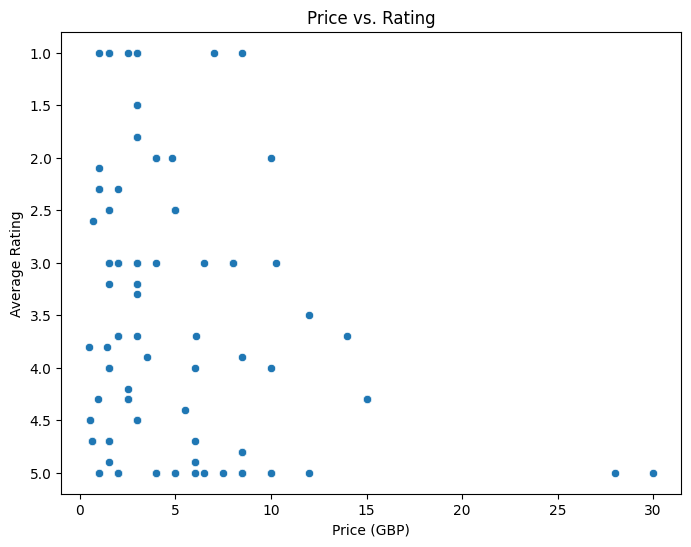

In [18]:
# Scatter plot of price vs avg_rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='price', y='avg_rating')
plt.title('Price vs. Rating')
plt.xlabel('Price (GBP)')
plt.ylabel('Average Rating')
plt.show()


In [30]:
# Outlier detection for price using IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers in price: {len(outliers)}")
print(outliers[['name', 'price']])

Number of outliers in price: 15
                                            name  price
1       Bondi Sands Aero Self Tanning Foam 225Ml  19.00
4       Skinny Tan Moisture Mousse Express 150Ml  28.00
5          Bondi Sands 1 Hour Express Foam 225Ml  18.99
7    Skinny Tan Coconut Water Tanning Mist 150Ml  22.00
19           Wellbio 10 Billion Cfu Capsules X30  16.95
20                            Edinburgh Gin 70Cl  28.00
26   Assassin's Creed Valhalla Xbox One Series X  29.00
30     Hp 302 Xl Tri Color Printer Ink Cartridge  30.00
210                            Redex 5W-30 Vw 2L  16.00
215                        Castrol Edge 5W-30 1L  16.00
218             Redex 5W-30 Peugeot & Citroen 2L  16.00
239                        Castrol Edge 5W-30 1L  16.00
244             Redex 5W-30 Peugeot & Citroen 2L  16.00
263                        Castrol Edge 5W-30 1L  16.00
265             Redex 5W-30 Peugeot & Citroen 2L  16.00


In [21]:
# Detecting outliers in price using the IQR method
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_cleaned[(df_cleaned['price'] < (Q1 - 1.5 * IQR)) | (df_cleaned['price'] > (Q3 + 1.5 * IQR))]
print("Outliers based on price:", outliers)

Outliers based on price:                                             name         gtin13        sku  \
1       Bondi Sands Aero Self Tanning Foam 225Ml   850278004893  305038535   
4       Skinny Tan Moisture Mousse Express 150Ml  9346752002802  305251472   
5          Bondi Sands 1 Hour Express Foam 225Ml   850278004534  300863118   
7    Skinny Tan Coconut Water Tanning Mist 150Ml  9346752001102  305055952   
19           Wellbio 10 Billion Cfu Capsules X30  5021265249381  305945890   
20                            Edinburgh Gin 70Cl  5060232070009  276602666   
26   Assassin's Creed Valhalla Xbox One Series X  3307216168041  307737407   
30     Hp 302 Xl Tri Color Printer Ink Cartridge   888793803097  290522929   
210                            Redex 5W-30 Vw 2L  5010218005112  304717908   
215                        Castrol Edge 5W-30 1L  4008177111617  290364570   
218             Redex 5W-30 Peugeot & Citroen 2L  5010218005136  304717897   
239                        Castrol Edge

In [22]:
# Products with missing or zero ratings
missing_ratings = df_cleaned[df_cleaned['avg_rating'].isnull() | (df_cleaned['avg_rating'] == 0)]
print("Products with missing or zero ratings:", missing_ratings)

Products with missing or zero ratings: Empty DataFrame
Columns: [name, gtin13, sku, price, condition, availability, currency, brand, breadcrumbs, description, images, avg_rating, reviews_count, url, _id, crawled_at, source]
Index: []


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


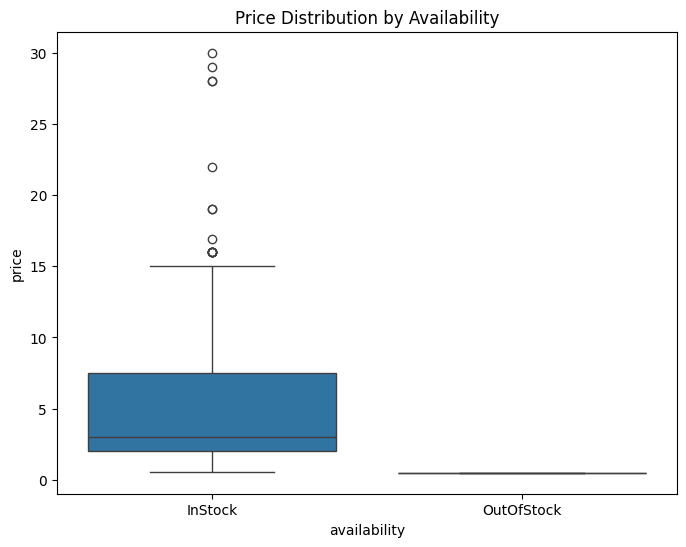

In [24]:
# Boxplot for price distribution by availability
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='availability', y='price')
plt.title('Price Distribution by Availability')
plt.show()